<a href="https://colab.research.google.com/github/vladimirsnap/useful-/blob/main/lemmitization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# подготавливаем рабочее пространство,
# загружаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords as nltk_stopwords
nltk.download('stopwords')
stopwords = set(nltk_stopwords.words('russian'))

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import nltk
from nltk.corpus import stopwords as nltk_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

pd.set_option('display.max_columns', None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:


# загружаем данные обучающей выборки,
# выводим информацию по датасету,
# выводим первые 5 строк
# Ссылка на файл в репозитории
url = 'https://raw.githubusercontent.com/vladimirsnap/useful-/main/tweets_lemm_train.csv'

# Чтение файла
data_train = pd.read_csv(url)
display(data_train.info())
display(data_train.head(5))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5000 non-null   object
 1   positive   5000 non-null   int64 
 2   lemm_text  5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


None

,text,positive,lemm_text
0,"@first_timee хоть я и школота, но поверь, у на...",1,хоть я и школотый но поверь у мы то же самый о...
1,"Да, все-таки он немного похож на него. Но мой ...",1,да весь таки он немного похожий на он но мой м...
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,ну ты идиотка я испугаться за ты
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,кто то в угол сидеть и погибать от голод а мы ...
4,@irina_dyshkant Вот что значит страшилка :D\r\...,1,вот что значит страшилка но блин посмотреть ве...


In [3]:
# загружаем данные тестовой выборки,
# выводим информацию по датасету,
# выводим первые 5 строк
url_test = 'https://raw.githubusercontent.com/vladimirsnap/useful-/main/tweets_lemm_test.csv'

# Чтение файла
data_test = pd.read_csv(url_test)
display(data_train.info())
display(data_train.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       5000 non-null   object
 1   positive   5000 non-null   int64 
 2   lemm_text  5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


None

,text,positive,lemm_text
0,"@first_timee хоть я и школота, но поверь, у на...",1,хоть я и школотый но поверь у мы то же самый о...
1,"Да, все-таки он немного похож на него. Но мой ...",1,да весь таки он немного похожий на он но мой м...
2,RT @KatiaCheh: Ну ты идиотка) я испугалась за ...,1,ну ты идиотка я испугаться за ты
3,"RT @digger2912: ""Кто то в углу сидит и погибае...",1,кто то в угол сидеть и погибать от голод а мы ...
4,@irina_dyshkant Вот что значит страшилка :D\r\...,1,вот что значит страшилка но блин посмотреть ве...


In [4]:
stopwords = list(nltk_stopwords.words('russian'))

count_tf_idf_train = TfidfVectorizer(stop_words=stopwords)
tf_idf_train = count_tf_idf_train.fit_transform(data_train.lemm_text)
display(tf_idf_train.shape)


(5000, 9737)

In [5]:
stopwords = list(nltk_stopwords.words('russian'))

count_tf_idf_test = TfidfVectorizer(stop_words=stopwords)
tf_idf_test = count_tf_idf_train.transform(data_test.lemm_text)
display(tf_idf_test.shape)


(3000, 9737)

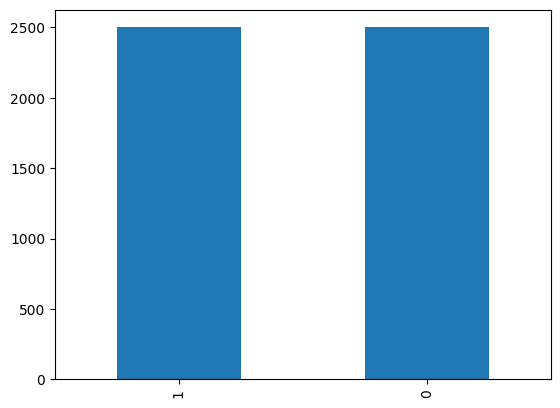

In [6]:
# проверяем распределение классов в обучающей выборке
data_train['positive'].value_counts().plot.bar();

In [7]:
# делим обучающую выборку на признаки (матрица X) и целевую переменную (y)
X_train = data_train.drop('positive', axis=1)
y_train = data_train['positive']

In [8]:
# задаем алгоритм для модели
model = LogisticRegression(random_state=0)

# обучаем модель
model.fit(tf_idf_train, y_train)



LogisticRegression(random_state=0)

In [9]:
# делаем предсказание на обучающей выборке,
# проверяем метрику accuracy
pred_train = model.predict(tf_idf_train)
print('Accuracy: {:.2f}'.format(accuracy_score(y_train, pred_train)))

Accuracy: 0.90


In [10]:
# делаем предсказание на тестовой выборке
predictions = model.predict(tf_idf_test)

# добавляем столбец с предсказаниями в тестовую выборку
data_test['positive'] = predictions

display(data_test.head(5))



,text,lemm_text,positive
0,RT @tiredfennel: если криса так интересуют дет...,если крис так интересовать ребёнок то либо они...,1
1,@xsealord по 200 руб. в месяц можно разместить...,по рубль в месяц можно разместить ссылка на те...,0
2,"@haosANDlaw @Etishkindyx учитывая, что сейчас ...",учитывать что сейчас преобладать один половина...,0
3,Товарищ :) Но я никак не могу отдельно не о...,товарищ но я никак не мочь отдельно не отметит...,0
4,RT @BodyaNick: Квн был отличный !) Оооочень по...,квн быть отличный оооочень понравиться женский...,1


In [13]:


# сохраняем файл
data_test.to_csv('predictions')

